In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
infile = open('..//real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,Bełdów-Krzywa Wieś,zgierski,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,Stanisławów Nowy,pabianicki,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
2,Julianowo,szczycieński,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
3,Nadarzyn,pruszkowski,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
4,Rusiec,pruszkowski,52.065800,20.803900,1160.0,brak,utwardzana,brak,brak,brak,brak,255200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7485,Cholerzyn,krakowski,50.058603,19.773954,1670.0,brak,polna,brak,brak,brak,brak,333000.0
7486,Mogilany,krakowski,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7487,Nowa Wieś Szlachecka,krakowski,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7488,Czernichów,krakowski,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            7490 non-null   object 
 1   district        7490 non-null   object 
 2   localization_y  7490 non-null   float64
 3   localization_x  7490 non-null   float64
 4   area            7490 non-null   float64
 5   sewers          7490 non-null   object 
 6   road            7490 non-null   object 
 7   fence           7490 non-null   object 
 8   water           7490 non-null   object 
 9   electricity     7490 non-null   object 
 10  gas             7490 non-null   object 
 11  price           7490 non-null   float64
dtypes: float64(4), object(8)
memory usage: 702.3+ KB


In [5]:
frame = frame.drop(['city','localization_y','localization_x'],axis=1)

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district     7490 non-null   object 
 1   area         7490 non-null   float64
 2   sewers       7490 non-null   object 
 3   road         7490 non-null   object 
 4   fence        7490 non-null   object 
 5   water        7490 non-null   object 
 6   electricity  7490 non-null   object 
 7   gas          7490 non-null   object 
 8   price        7490 non-null   float64
dtypes: float64(2), object(7)
memory usage: 526.8+ KB


## creating dummy variables

In [7]:
dummies = pd.get_dummies(frame[['district','sewers','road','fence','water','electricity','gas']],drop_first=True)
frame = frame.drop(['district','sewers','road','fence','water','electricity','gas'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Columns: 632 entries, area to gas_w drodze
dtypes: float64(2), uint8(630)
memory usage: 4.6 MB


In [9]:
frame

,area,price,district_Andrzejów,district_Anin,district_BIAŁOSTOCKI,district_Bacieczki,district_Baranówek,district_Bałuty,district_Bemowo,district_Bezrzecze,...,fence_metalowe,fence_mieszane,fence_siatka,water_wodociąg na działce,water_wodociąg w drodze,water_własne ujęcie/studnia,electricity_na działce,electricity_w drodze,gas_na działce,gas_w drodze
0,1004.0,90360.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1200.0,84000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1262.0,88340.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,950.0,295000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1160.0,255200.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,1670.0,333000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7486,2000.0,360000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7487,4400.0,160000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7488,4400.0,440000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price',axis=1).values
y = frame['price'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(5617, 631)

In [18]:
X_test.shape

(1873, 631)

## creating model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()

model.add(Dense(512,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               323584    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 498,177
Trainable params: 498,177
Non-trainable params: 0
__________________________________________________

In [22]:
# from tensorflow.keras.callbacks import EarlyStopping

In [23]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [24]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=1500,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 5617 samples, validate on 1873 samples
Epoch 1/1500
5617/5617 [==============================] - 5s 887us/sample - loss: 961772166320.6522 - val_loss: 1015013686185.0720
Epoch 2/1500
5617/5617 [==============================] - 1s 125us/sample - loss: 961523643191.2836 - val_loss: 1014031015887.8889
Epoch 3/1500
5617/5617 [==============================] - ETA: 0s - loss: 951275405312.00 - 1s 116us/sample - loss: 956665473617.2163 - val_loss: 1000243839404.6257
Epoch 4/1500
5617/5617 [==============================] - 1s 124us/sample - loss: 916335521722.7246 - val_loss: 912444050605.3091
Epoch 5/1500
5617/5617 [==============================] - 1s 130us/sample - loss: 783217864701.8124 - val_loss: 776710755823.8719
Epoch 6/1500
5617/5617 [==============================] - 1s 107us/sample - loss: 725580374110.7980 - val_loss: 759973251140.8862
Epoch 7/1500
5617/5617 [==============================] - 1s 122us/sample - loss: 702288964113.0454 - val_loss: 741360284866.0845
Epoch

5617/5617 [==============================] - 1s 138us/sample - loss: 300221956513.1109 - val_loss: 476462422537.5676
Epoch 63/1500
5617/5617 [==============================] - 1s 132us/sample - loss: 297591077570.2446 - val_loss: 473666014398.8041
Epoch 64/1500
5617/5617 [==============================] - 1s 136us/sample - loss: 296666620693.0105 - val_loss: 476519385568.0171
Epoch 65/1500
5617/5617 [==============================] - 1s 122us/sample - loss: 297004718303.5043 - val_loss: 476965553396.3823
Epoch 66/1500
5617/5617 [==============================] - 1s 123us/sample - loss: 295707563339.6105 - val_loss: 476511942455.9017
Epoch 67/1500
5617/5617 [==============================] - 1s 116us/sample - loss: 294612655260.2343 - val_loss: 476742573402.0715
Epoch 68/1500
5617/5617 [==============================] - 1s 113us/sample - loss: 295445652612.5349 - val_loss: 472582351096.2093
Epoch 69/1500
5617/5617 [==============================] - 1s 122us/sample - loss: 294906133238.7

5617/5617 [==============================] - 1s 116us/sample - loss: 273620341481.9868 - val_loss: 475573818478.9835
Epoch 125/1500
5617/5617 [==============================] - 1s 123us/sample - loss: 273720491929.9099 - val_loss: 475597616444.5488
Epoch 126/1500
5617/5617 [==============================] - 1s 126us/sample - loss: 273096264160.9172 - val_loss: 478225377711.9060
Epoch 127/1500
5617/5617 [==============================] - 1s 119us/sample - loss: 270262217938.9254 - val_loss: 472653953917.3348
Epoch 128/1500
5617/5617 [==============================] - 1s 114us/sample - loss: 269381894161.5012 - val_loss: 477058689464.6535
Epoch 129/1500
5617/5617 [==============================] - 1s 129us/sample - loss: 269611650636.6587 - val_loss: 473787783505.8708
Epoch 130/1500
5617/5617 [==============================] - 1s 129us/sample - loss: 269608989684.8795 - val_loss: 473585685282.5798
Epoch 131/1500
5617/5617 [==============================] - 1s 131us/sample - loss: 2691523

5617/5617 [==============================] - 1s 135us/sample - loss: 212883061760.1823 - val_loss: 420744526402.4260
Epoch 187/1500
5617/5617 [==============================] - 1s 135us/sample - loss: 211448325033.7704 - val_loss: 419128358466.9728
Epoch 188/1500
5617/5617 [==============================] - 1s 130us/sample - loss: 211465571528.7164 - val_loss: 419270784815.1543
Epoch 189/1500
5617/5617 [==============================] - 1s 142us/sample - loss: 210619777295.2679 - val_loss: 416675529158.8681
Epoch 190/1500
5617/5617 [==============================] - 1s 136us/sample - loss: 209869994684.4109 - val_loss: 415041405269.1511
Epoch 191/1500
5617/5617 [==============================] - ETA: 0s - loss: 201397335654.4000 ETA: 0s - loss: 175576619 - 1s 130us/sample - loss: 209476955626.9439 - val_loss: 414848754901.7661
Epoch 192/1500
5617/5617 [==============================] - 1s 121us/sample - loss: 208976028215.3292 - val_loss: 413013517928.1495
Epoch 193/1500
5617/5617 [===

Epoch 248/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 168709141839.9857 - val_loss: 399711334262.2274
Epoch 249/1500
5617/5617 [==============================] - 0s 44us/sample - loss: 167359911742.3935 - val_loss: 395255054563.4341
Epoch 250/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 165446472423.0700 - val_loss: 396957428406.3300
Epoch 251/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 165895449105.0454 - val_loss: 399106763962.4303
Epoch 252/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 164370943321.1010 - val_loss: 397704681110.0737
Epoch 253/1500
5617/5617 [==============================] - 0s 43us/sample - loss: 164336381824.3874 - val_loss: 400576136261.4330
Epoch 254/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 165822642965.3751 - val_loss: 401704140773.7576
Epoch 255/1500
5617/5617 [==============================] - 0s 44us/sample - loss: 

5617/5617 [==============================] - 0s 45us/sample - loss: 150542298912.1310 - val_loss: 417328802118.9365
Epoch 311/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 151427002103.2950 - val_loss: 418115368899.8612
Epoch 312/1500
5617/5617 [==============================] - 0s 44us/sample - loss: 151422714203.1063 - val_loss: 422746038844.9588
Epoch 313/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 149946145955.5264 - val_loss: 421781068586.2339
Epoch 314/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 149904537956.2215 - val_loss: 417495013766.3556
Epoch 315/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 151338379521.7775 - val_loss: 421364929192.1153
Epoch 316/1500
5617/5617 [==============================] - 0s 44us/sample - loss: 150407659175.8106 - val_loss: 429210360828.1730
Epoch 317/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 149888869566.87

5617/5617 [==============================] - 0s 51us/sample - loss: 140622215328.7919 - val_loss: 443409812775.7736
Epoch 373/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 139143618597.9192 - val_loss: 454800207506.7934
Epoch 374/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 140284353406.3820 - val_loss: 447878133988.5275
Epoch 375/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 139525409753.5339 - val_loss: 456360603361.5206
Epoch 376/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 139510083991.6311 - val_loss: 443943111958.2787
Epoch 377/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 140182542935.7792 - val_loss: 440768641296.2648
Epoch 378/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 137165579164.6445 - val_loss: 445004297707.4981
Epoch 379/1500
5617/5617 [==============================] - 0s 52us/sample - loss: 138972418179.25

5617/5617 [==============================] - 0s 45us/sample - loss: 130417348338.9197 - val_loss: 468416597593.9349
Epoch 435/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 130429944773.4805 - val_loss: 468054225431.7822
Epoch 436/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 129067213055.2252 - val_loss: 458773207491.5878
Epoch 437/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 128510870734.9147 - val_loss: 470326867164.3267
Epoch 438/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 127766701976.0869 - val_loss: 460078264523.3785
Epoch 439/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 129820227724.3739 - val_loss: 458649994878.0181
Epoch 440/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 128923251152.5099 - val_loss: 482592971387.2845
Epoch 441/1500
5617/5617 [==============================] - 0s 44us/sample - loss: 133718209327.99

5617/5617 [==============================] - 0s 55us/sample - loss: 121908402975.5841 - val_loss: 493612382007.9017
Epoch 497/1500
5617/5617 [==============================] - 0s 63us/sample - loss: 121668898223.1483 - val_loss: 497576326757.9626
Epoch 498/1500
5617/5617 [==============================] - 0s 56us/sample - loss: 120240556947.5293 - val_loss: 487388941459.0667
Epoch 499/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 121593614419.8597 - val_loss: 488630655620.0320
Epoch 500/1500
5617/5617 [==============================] - 0s 44us/sample - loss: 120264321957.0305 - val_loss: 498554000153.8323
Epoch 501/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 118896531686.7965 - val_loss: 495192342545.4949
Epoch 502/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 118988504842.9838 - val_loss: 504355218846.9578
Epoch 503/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 118522503087.78

5617/5617 [==============================] - 0s 47us/sample - loss: 113828603765.0846 - val_loss: 519441390509.4458
Epoch 559/1500
5617/5617 [==============================] - 0s 42us/sample - loss: 113904370861.3708 - val_loss: 544987155743.0262
Epoch 560/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 114146686722.5978 - val_loss: 518456703431.9615
Epoch 561/1500
5617/5617 [==============================] - 0s 44us/sample - loss: 112652961459.1134 - val_loss: 542100348092.6172
Epoch 562/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 112810771242.8869 - val_loss: 539497642956.0620
Epoch 563/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 112654511689.7419 - val_loss: 523899964178.1783
Epoch 564/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 112169128541.9776 - val_loss: 543254975616.4784
Epoch 565/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 111533636930.49

5617/5617 [==============================] - 0s 52us/sample - loss: 107862098413.6785 - val_loss: 551062059945.0720
Epoch 621/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 107564395738.2175 - val_loss: 549383556496.7432
Epoch 622/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 105814998951.7650 - val_loss: 551563532844.5574
Epoch 623/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 109530974153.6735 - val_loss: 549564059960.7219
Epoch 624/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 110908809695.8234 - val_loss: 561074992435.8014
Epoch 625/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 109407451653.3780 - val_loss: 553618388162.0844
Epoch 626/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 111030151874.9738 - val_loss: 544561250715.1308
Epoch 627/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 109589989050.40

5617/5617 [==============================] - ETA: 0s - loss: 108054928627.80 - 0s 55us/sample - loss: 106694440849.5239 - val_loss: 655554148283.1138
Epoch 683/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 109321304202.1862 - val_loss: 616926189109.8516
Epoch 684/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 106001993421.0005 - val_loss: 604425280560.6577
Epoch 685/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 104552672586.5166 - val_loss: 598659548544.3417
Epoch 686/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 104221503399.7650 - val_loss: 584719255367.2098
Epoch 687/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 103792597505.7319 - val_loss: 590748976363.6348
Epoch 688/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 103031592471.0614 - val_loss: 598467001536.9910
Epoch 689/1500
5617/5617 [==============================] - 0s 5

5617/5617 [==============================] - 0s 48us/sample - loss: 101718684547.1219 - val_loss: 604751846693.5868
Epoch 745/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 101794518201.7675 - val_loss: 610582012984.3118
Epoch 746/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 101448212214.5658 - val_loss: 625093009919.7267
Epoch 747/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 99105863546.1891 - val_loss: 594133430457.8837
Epoch 748/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 98357466103.7963 - val_loss: 619410138990.5734
Epoch 749/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 98405351932.2628 - val_loss: 645965954783.3337
Epoch 750/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 99723656492.6188 - val_loss: 592622482862.2659
Epoch 751/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 102991578730.1919 -

Epoch 807/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 96766693308.1830 - val_loss: 658958358069.8516
Epoch 808/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 98941730624.2165 - val_loss: 687950857766.5435
Epoch 809/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 98431701778.0937 - val_loss: 612748559770.5841
Epoch 810/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 97257260132.4493 - val_loss: 660454114364.6855
Epoch 811/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 97806765414.2268 - val_loss: 689226241931.0027
Epoch 812/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 101725862796.2371 - val_loss: 666445641624.1240
Epoch 813/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 99948662322.4070 - val_loss: 646075092307.5110
Epoch 814/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 977625

Epoch 870/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 93911434709.4321 - val_loss: 740221071283.4597
Epoch 871/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 97184814455.3634 - val_loss: 769221950665.7384
Epoch 872/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 103013372345.1750 - val_loss: 726622351913.2771
Epoch 873/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 96599170459.4595 - val_loss: 678814420884.8435
Epoch 874/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 98224160296.9272 - val_loss: 694960390773.8174
Epoch 875/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 93790425828.8823 - val_loss: 660726289291.5494
Epoch 876/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 93304003686.2724 - val_loss: 719813176418.9557
Epoch 877/1500
5617/5617 [==============================] - 0s 45us/sample - loss: 942383

Epoch 933/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 90295711825.6721 - val_loss: 784738527506.4517
Epoch 934/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 91923458948.9450 - val_loss: 779405953740.1986
Epoch 935/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 94612889301.0219 - val_loss: 729702410042.0886
Epoch 936/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 91298304060.5248 - val_loss: 723238167275.9082
Epoch 937/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 90130659587.9651 - val_loss: 770793256637.4373
Epoch 938/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 89130546588.5533 - val_loss: 749433908165.5013
Epoch 939/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 90702485628.3311 - val_loss: 763729433299.8527
Epoch 940/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 9012885

5617/5617 [==============================] - 0s 48us/sample - loss: 90174627266.8371 - val_loss: 873588006802.6567
Epoch 997/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 91969894025.5482 - val_loss: 916688927403.3956
Epoch 998/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 92638131867.0493 - val_loss: 871403978349.6167
Epoch 999/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 88268469450.5394 - val_loss: 839964521762.3065
Epoch 1000/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 87136356108.0776 - val_loss: 770423926532.5104
Epoch 1001/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 88069664972.9094 - val_loss: 816348009670.4581
Epoch 1002/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 86385365837.1600 - val_loss: 788656575747.6903
Epoch 1003/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 85513020256.8488 -

5617/5617 [==============================] - 0s 66us/sample - loss: 86673296643.0536 - val_loss: 951182261939.5963
Epoch 1059/1500
5617/5617 [==============================] - 0s 61us/sample - loss: 82749259927.6767 - val_loss: 796979917309.5398
Epoch 1060/1500
5617/5617 [==============================] - 0s 64us/sample - loss: 86935070198.9760 - val_loss: 867021888271.9915
Epoch 1061/1500
5617/5617 [==============================] - 0s 52us/sample - loss: 83890271757.5816 - val_loss: 847718361642.3705
Epoch 1062/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 83704446039.6881 - val_loss: 863865917551.5303
Epoch 1063/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 91604634330.3087 - val_loss: 838855881965.8217
Epoch 1064/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 88665768070.1755 - val_loss: 890466750348.0961
Epoch 1065/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 84310156554.710

5617/5617 [==============================] - 0s 50us/sample - loss: 89823527795.8084 - val_loss: 929189454388.2115
Epoch 1121/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 85338869236.4237 - val_loss: 999069420008.7645
Epoch 1122/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 79578436822.9361 - val_loss: 965645932435.7501
Epoch 1123/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 80026628795.3171 - val_loss: 985170361502.0010
Epoch 1124/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 82359342347.4396 - val_loss: 1052166836825.3882
Epoch 1125/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 81212161563.8013 - val_loss: 964358829818.6696
Epoch 1126/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 85807124655.7408 - val_loss: 984830096770.5286
Epoch 1127/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 88909837112.74

5617/5617 [==============================] - 0s 63us/sample - loss: 85383348797.1629 - val_loss: 1045374720215.4062
Epoch 1183/1500
5617/5617 [==============================] - 0s 61us/sample - loss: 79704035419.1519 - val_loss: 942141227769.0294
Epoch 1184/1500
5617/5617 [==============================] - 0s 58us/sample - loss: 83806152713.1152 - val_loss: 986452556022.0225
Epoch 1185/1500
5617/5617 [==============================] - 0s 55us/sample - loss: 78978881669.0817 - val_loss: 1102382268048.6064
Epoch 1186/1500
5617/5617 [==============================] - 0s 53us/sample - loss: 80714172242.0822 - val_loss: 1088132737569.6230
Epoch 1187/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 82878569638.4433 - val_loss: 1083449013170.9130
Epoch 1188/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 82789601836.3910 - val_loss: 1090990059373.4800
Epoch 1189/1500
5617/5617 [==============================] - 0s 46us/sample - loss: 8263802279

5617/5617 [==============================] - 0s 48us/sample - loss: 81194341570.5181 - val_loss: 1131474412101.7063
Epoch 1245/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 77547438955.0579 - val_loss: 1071871018998.1591
Epoch 1246/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 79602517163.9124 - val_loss: 1077906342955.1906
Epoch 1247/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 82213892648.0157 - val_loss: 1092414136639.2825
Epoch 1248/1500
5617/5617 [==============================] - 0s 52us/sample - loss: 80865775753.8216 - val_loss: 1016108294559.5045
Epoch 1249/1500
5617/5617 [==============================] - 0s 53us/sample - loss: 76308897325.3025 - val_loss: 1174088469222.4409
Epoch 1250/1500
5617/5617 [==============================] - 0s 52us/sample - loss: 81769869321.4798 - val_loss: 1208820167952.8115
Epoch 1251/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 77979256

5617/5617 [==============================] - 0s 56us/sample - loss: 81547775739.6703 - val_loss: 1145016268127.5388
Epoch 1307/1500
5617/5617 [==============================] - 0s 56us/sample - loss: 81247571337.2291 - val_loss: 1272263780171.5835
Epoch 1308/1500
5617/5617 [==============================] - 0s 56us/sample - loss: 77786259321.8245 - val_loss: 1133573579937.2812
Epoch 1309/1500
5617/5617 [==============================] - 0s 56us/sample - loss: 80285834908.1431 - val_loss: 1217020399036.4805
Epoch 1310/1500
5617/5617 [==============================] - 0s 56us/sample - loss: 78585263311.6439 - val_loss: 1106670975589.4160
Epoch 1311/1500
5617/5617 [==============================] - 0s 59us/sample - loss: 76320895577.6023 - val_loss: 1290622071730.9131
Epoch 1312/1500
5617/5617 [==============================] - 0s 57us/sample - loss: 79932093339.9153 - val_loss: 1338898804265.8237
Epoch 1313/1500
5617/5617 [==============================] - 0s 58us/sample - loss: 79460950

5617/5617 [==============================] - 0s 54us/sample - loss: 75373456072.8076 - val_loss: 1223282954325.2878
Epoch 1369/1500
5617/5617 [==============================] - 0s 53us/sample - loss: 77382523333.9363 - val_loss: 1275822752784.9482
Epoch 1370/1500
5617/5617 [==============================] - 0s 55us/sample - loss: 73408745573.3609 - val_loss: 1186554426089.7212
Epoch 1371/1500
5617/5617 [==============================] - 0s 52us/sample - loss: 73743270036.7598 - val_loss: 1145108745336.8245
Epoch 1372/1500
5617/5617 [==============================] - 0s 52us/sample - loss: 76132332019.5122 - val_loss: 1138277974873.2515
Epoch 1373/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 75195763701.9733 - val_loss: 1345224454312.3887
Epoch 1374/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 74032848338.1506 - val_loss: 1254072420735.7949
Epoch 1375/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 71721696

5617/5617 [==============================] - 0s 50us/sample - loss: 71599705845.1073 - val_loss: 1373249715253.0315
Epoch 1431/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 72217935491.3498 - val_loss: 1677708436396.3523
Epoch 1432/1500
5617/5617 [==============================] - 0s 51us/sample - loss: 77229507971.7600 - val_loss: 1513102942186.1311
Epoch 1433/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 79591927479.8533 - val_loss: 1403024051067.1477
Epoch 1434/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 83947823728.2079 - val_loss: 1257470489977.7810
Epoch 1435/1500
5617/5617 [==============================] - 0s 49us/sample - loss: 81850773899.9637 - val_loss: 1206518525298.1270
Epoch 1436/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 76182828446.7410 - val_loss: 1411706995274.0801
Epoch 1437/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 74103624

5617/5617 [==============================] - 0s 47us/sample - loss: 75663678706.2816 - val_loss: 1486899393520.1453
Epoch 1493/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 72578196205.6329 - val_loss: 1519031238472.3032
Epoch 1494/1500
5617/5617 [==============================] - 0s 47us/sample - loss: 71054986373.6286 - val_loss: 1621158294503.3977
Epoch 1495/1500
5617/5617 [==============================] - 0s 48us/sample - loss: 69428413756.2970 - val_loss: 1537539902156.1987
Epoch 1496/1500
5617/5617 [==============================] - 0s 50us/sample - loss: 71989544492.9379 - val_loss: 1630437691888.4189
Epoch 1497/1500
5617/5617 [==============================] - 0s 53us/sample - loss: 71227793243.1974 - val_loss: 1706285464130.4260
Epoch 1498/1500
5617/5617 [==============================] - 0s 54us/sample - loss: 71779663669.2783 - val_loss: 1510499947298.5798
Epoch 1499/1500
5617/5617 [==============================] - 0s 55us/sample - loss: 71308206

In [25]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

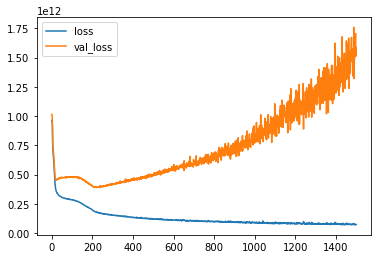

In [26]:
losses.plot()
# plt.ylim(0,20000000000)

## model ewaluation

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [28]:
predictions = model.predict(X_test)

In [29]:
mean_absolute_error(y_test,predictions)

372092.9997037465

In [30]:
np.sqrt(mean_squared_error(y_test,predictions))

1259826.1440787045

In [31]:
explained_variance_score(y_test,predictions)

-1.0518419608936043

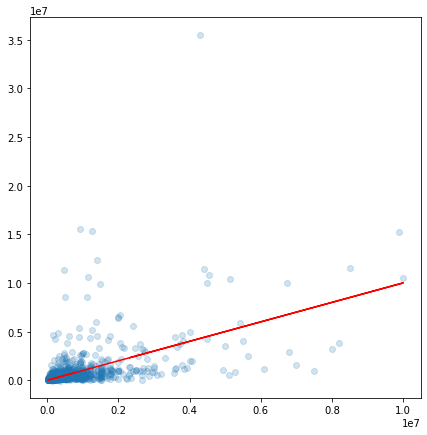

In [32]:
plt.figure(figsize=(7,7))
# plt.xlim(0,3000000)
# plt.ylim(0,3000000)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [33]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

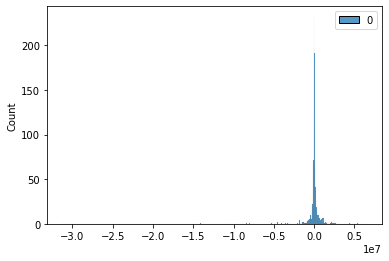

In [34]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [35]:
predictions.reshape(y_test.shape[0])[:20]

array([2182124.   , 4678880.5  ,  188233.34 ,   59688.773,  128004.05 ,
        154884.33 ,  279195.6  ,  754332.56 ,  210705.62 ,   61968.438,
        117920.97 , 3692947.5  ,  401277.12 , 2230874.8  , 3063275.5  ,
         85112.35 ,   71980.08 ,  109034.57 ,   74207.04 ,   89772.555],
      dtype=float32)

In [36]:
y_test[:20]

array([ 765000.,  150000.,  220000.,   80000.,  149000.,  137500.,
        470000.,  160000.,  235000.,   72000.,   70000., 2599000.,
        466000., 1500000., 2709000.,   69000.,   86000.,  200000.,
        110000.,   49000.])

In [37]:
predictions.reshape(y_test.shape[0])[:20]-y_test[:20]

array([1417124.       , 4528880.5      ,  -31766.65625  ,  -20311.2265625,
        -20995.953125 ,   17384.328125 , -190804.40625  ,  594332.5625   ,
        -24294.375    ,  -10031.5625   ,   47920.96875  , 1093947.5      ,
        -64722.875    ,  730874.75     ,  354275.5      ,   16112.3515625,
        -14019.921875 ,  -90965.4296875,  -35792.9609375,   40772.5546875])